<a href="https://colab.research.google.com/github/Aashish-05/Weatherdataanalysis_202401100300002/blob/main/AashishPandey_202401100300002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Average Temperature: 15.2 °C
Highest Temperature: 32.92 °C
Lowest Temperature: -3.66 °C
Most Humid Day: 2024-01-01
Total Rainfall: 530.25 mm


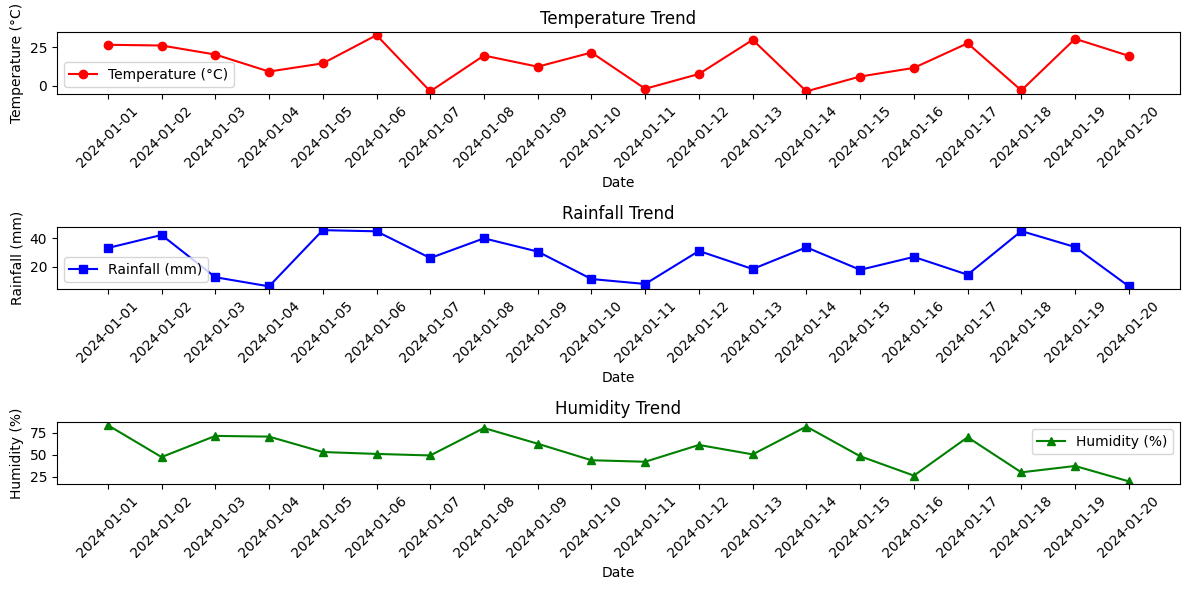

In [3]:
import csv
import matplotlib.pyplot as plt  # Importing Matplotlib for graph visualization

# Function to read weather data from a CSV file
def read_weather_data(filename):
    weather_data = []
    with open(filename, 'r') as file:
        reader = csv.DictReader(file)  # Read as dictionary
        for row in reader:
            # Convert necessary columns to float for calculations
            weather_data.append({
                "date": row["Date"],
                "temperature": float(row["Temperature"]),
                "rainfall": float(row["Rainfall"]),
                "humidity": float(row["Humidity"])
            })
    return weather_data  # Return the list of weather data

# Function to calculate the average temperature
def average_temperature(data):
    total_temp = sum(entry["temperature"] for entry in data)  # Sum of all temperatures
    return total_temp / len(data)  # Divide by total number of days

# Function to find the highest and lowest temperatures
def temperature_extremes(data):
    temperatures = [entry["temperature"] for entry in data]  # Extract temperature values
    return max(temperatures), min(temperatures)  # Return highest and lowest temperature

# Function to find the most humid day
def most_humid_day(data):
    return max(data, key=lambda x: x["humidity"])["date"]  # Find the day with max humidity

# Function to calculate total rainfall over all days
def total_rainfall(data):
    return sum(entry["rainfall"] for entry in data)  # Sum of all rainfall values

# Function to plot weather trends
def plot_weather_data(data):
    dates = [entry["date"] for entry in data]  # Extracting dates
    temperatures = [entry["temperature"] for entry in data]  # Extracting temperatures
    rainfall = [entry["rainfall"] for entry in data]  # Extracting rainfall
    humidity = [entry["humidity"] for entry in data]  # Extracting humidity

    plt.figure(figsize=(12, 6))  # Set figure size

    # Plot Temperature
    plt.subplot(3, 1, 1)  # First subplot
    plt.plot(dates, temperatures, marker='o', linestyle='-', color='r', label="Temperature (°C)")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.title("Temperature Trend")
    plt.xticks(rotation=45)
    plt.legend()

    # Plot Rainfall
    plt.subplot(3, 1, 2)  # Second subplot
    plt.plot(dates, rainfall, marker='s', linestyle='-', color='b', label="Rainfall (mm)")
    plt.xlabel("Date")
    plt.ylabel("Rainfall (mm)")
    plt.title("Rainfall Trend")
    plt.xticks(rotation=45)
    plt.legend()

    # Plot Humidity
    plt.subplot(3, 1, 3)  # Third subplot
    plt.plot(dates, humidity, marker='^', linestyle='-', color='g', label="Humidity (%)")
    plt.xlabel("Date")
    plt.ylabel("Humidity (%)")
    plt.title("Humidity Trend")
    plt.xticks(rotation=45)
    plt.legend()

    plt.tight_layout()  # Adjust layout for better readability
    plt.show()  # Display the graphs

# Main program execution
if __name__ == "__main__":
    filename = "weather_data.csv"  # Name of the CSV file containing weather data

    # Read weather data from CSV file
    data = read_weather_data(filename)

    # Calculate and display results
    print("Average Temperature:", round(average_temperature(data), 2), "°C")

    highest, lowest = temperature_extremes(data)
    print("Highest Temperature:", round(highest, 2), "°C")
    print("Lowest Temperature:", round(lowest, 2), "°C")

    print("Most Humid Day:", most_humid_day(data))
    print("Total Rainfall:", round(total_rainfall(data), 2), "mm")

    # Plot graphs
    plot_weather_data(data)
